In [132]:
import mygene
import pandas as pd

# 유전자 리스트 준비
gene_list = pd.read_csv("./extracted_genesets/mdel_pgain.csv")
gene_list = gene_list['Gene Symbol'].tolist()

# MyGene API를 통해 유전자 정보 가져오기
mg = mygene.MyGeneInfo()
query = mg.querymany(gene_list, scopes='symbol', fields='chrom,genomic_pos', species='human')

# 결과를 DataFrame으로 변환
df = pd.DataFrame(query)

# drop columns with no ['genomic_pos'] column
df = df.dropna(subset=['genomic_pos'])

# delete 'notfound' column from the dataframe
df = df.drop(columns = ['notfound'])
df

21 input query terms found dup hits:	[('APOC1P1', 2), ('APOC4-APOC2', 2), ('BIRC8', 2), ('CEACAM22P', 2), ('CYP2G1P', 2), ('FKBP1AP1', 2)
159 input query terms found no hit:	['ACPT', 'ADCK4', 'ATP5SL', 'C19orf40', 'C19orf46', 'C19orf48', 'C19orf51', 'C19orf54', 'C19orf55', 


,query,_id,_score,genomic_pos
0,A1BG,1,19.416883,"{'chr': '19', 'end': 58353492, 'ensemblgene': ..."
1,A1BG-AS1,503538,27.130838,"{'chr': '19', 'end': 58355455, 'ensemblgene': ..."
3,ACTN4,81,17.960705,"[{'chr': '19', 'end': 38731589, 'ensemblgene':..."
5,AKT1S1,84335,18.046598,"{'chr': '19', 'end': 49878459, 'ensemblgene': ..."
6,AKT2,208,17.884615,"{'chr': '19', 'end': 40285536, 'ensemblgene': ..."
...,...,...,...,...
983,ZSCAN18,65982,20.029404,"{'chr': '19', 'end': 58118427, 'ensemblgene': ..."
984,ZSCAN22,342945,19.688830,"{'chr': '19', 'end': 58342332, 'ensemblgene': ..."
985,ZSCAN4,201516,20.208664,"{'chr': '19', 'end': 57679152, 'ensemblgene': ..."
986,ZSCAN5A,79149,24.269800,"{'chr': '19', 'end': 56368383, 'ensemblgene': ..."


In [133]:
# 딕셔너리 필터링 함수 정의
def filter_and_flatten(genomic_loc):
    if isinstance(genomic_loc, list):  # 리스트인지 확인
        # 'chr' 값이 'H'로 시작하지 않는 딕셔너리 필터링
        filtered = [d for d in genomic_loc if not d.get('chr', '').startswith('H')]
        # 필터링 후, 하나의 딕셔너리만 반환
        return filtered[0] if filtered else None
    elif isinstance(genomic_loc, dict):  # 이미 딕셔너리인 경우 그대로 반환
        return genomic_loc
    else:
        return None  # 리스트나 딕셔너리가 아닌 경우 처리하지 않음

# 필터링 적용
df['genomic_pos'] = df['genomic_pos'].apply(filter_and_flatten)

# 결과 확인
print(df)


        query     _id     _score  \
0        A1BG       1  19.416883   
1    A1BG-AS1  503538  27.130838   
3       ACTN4      81  17.960705   
5      AKT1S1   84335  18.046598   
6        AKT2     208  17.884615   
..        ...     ...        ...   
983   ZSCAN18   65982  20.029404   
984   ZSCAN22  342945  19.688830   
985    ZSCAN4  201516  20.208664   
986   ZSCAN5A   79149  24.269800   
987   ZSCAN5B  342933  21.253632   

                                           genomic_pos  
0    {'chr': '19', 'end': 58353492, 'ensemblgene': ...  
1    {'chr': '19', 'end': 58355455, 'ensemblgene': ...  
3    {'chr': '19', 'end': 38731589, 'ensemblgene': ...  
5    {'chr': '19', 'end': 49878459, 'ensemblgene': ...  
6    {'chr': '19', 'end': 40285536, 'ensemblgene': ...  
..                                                 ...  
983  {'chr': '19', 'end': 58118427, 'ensemblgene': ...  
984  {'chr': '19', 'end': 58342332, 'ensemblgene': ...  
985  {'chr': '19', 'end': 57679152, 'ensemblgene': ...

In [134]:
df = df.dropna(subset=['genomic_pos'])

In [135]:
# df.to_csv('test.csv')

In [136]:
import pandas as pd

# 'genomic_pos'에서 필요한 데이터 추출
df['chrom'] = df['genomic_pos'].apply(lambda x: x.get('chr', None))  # 크로모좀
df['start'] = df['genomic_pos'].apply(lambda x: x.get('start', None))  # 시작 위치
df['end'] = df['genomic_pos'].apply(lambda x: x.get('end', None))  # 끝 위치

# 결과 확인
print(df[['query', 'chrom', 'start', 'end']])


        query chrom     start       end
0        A1BG    19  58345178  58353492
1    A1BG-AS1    19  58347718  58355455
3       ACTN4    19  38647649  38731589
5      AKT1S1    19  49869033  49878459
6        AKT2    19  40230317  40285536
..        ...   ...       ...       ...
983   ZSCAN18    19  58083838  58118427
984   ZSCAN22    19  58326994  58342332
985    ZSCAN4    19  57668935  57679152
986   ZSCAN5A    19  56219670  56368383
987   ZSCAN5B    19  56189686  56197815

[853 rows x 4 columns]


/tmp/ipykernel_15333/3234370689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chrom'] = df['genomic_pos'].apply(lambda x: x.get('chr', None))  # 크로모좀
/tmp/ipykernel_15333/3234370689.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start'] = df['genomic_pos'].apply(lambda x: x.get('start', None))  # 시작 위치
/tmp/ipykernel_15333/3234370689.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

/tmp/ipykernel_15333/796859852.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chrom'] = pd.Categorical(df['chrom'], categories=chromosomes, ordered=True)


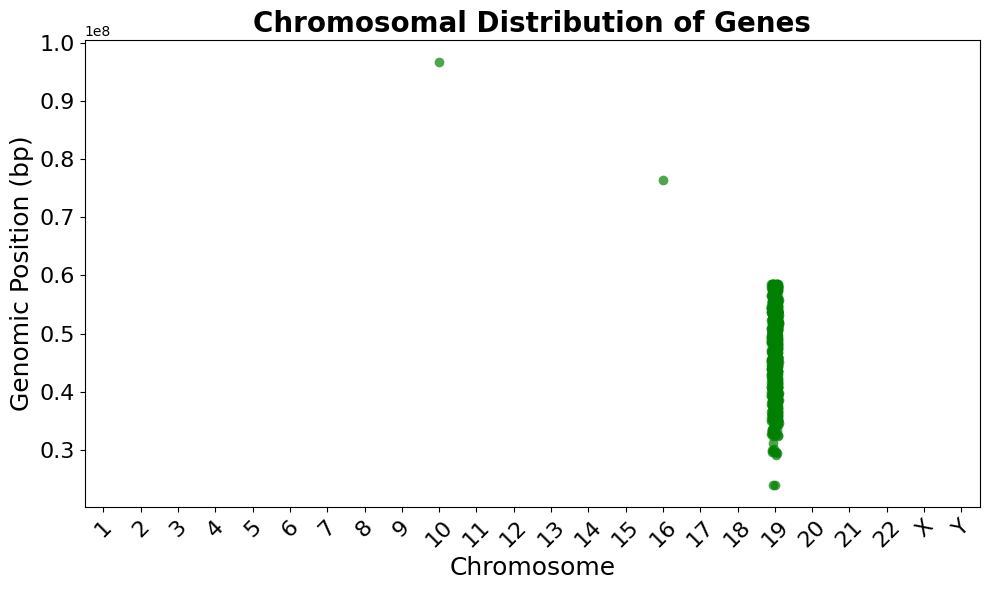

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# x축에 고정할 크로모좀 순서
chromosomes = [str(i) for i in range(1, 23)] + ['X', 'Y']  # 1~22, X, Y

# 데이터를 x축에 맞게 필터링 (정렬된 순서로 사용)
df['chrom'] = pd.Categorical(df['chrom'], categories=chromosomes, ordered=True)

# 시각화
plt.figure(figsize=(10, 6))
ax = sns.stripplot(data=df, x='chrom', y='start', jitter=True, size=7, color='green', alpha=0.7)

# x축을 고정된 크로모좀 순서로 설정
ax.set_xticks(range(len(chromosomes)))
ax.set_xticklabels(chromosomes, rotation=45, fontsize=16)
# ytick font size
plt.yticks(fontsize=16)

# 그래프 제목과 축 이름 설정
ax.set_title('Chromosomal Distribution of Genes', fontsize=20, fontweight='bold')
ax.set_xlabel('Chromosome', fontsize=18)
ax.set_ylabel('Genomic Position (bp)', fontsize=18)

plt.tight_layout()
plt.show()
